# 🐼 Part 4: Pandas Plotting Integration (High-Level API)

**Goal:** Master the direct plotting methods built into the Pandas library (`df.plot()`), which function as a high-level wrapper around Matplotlib. This allows for faster, more concise visualization code.

---
### Key Learning Objectives
1.  Use the `DataFrame.plot(kind='...')` syntax for Histograms, Lines, and Box Plots.
2.  Control plot positioning by passing the Matplotlib Axes object (`ax=`) to the Pandas `.plot()` method.
3.  Visualize complex analyses directly, such as **Rolling Averages** and **Groupby results**.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Set Matplotlib style for a clean look
plt.style.use('ggplot') 

print("🎯 Discovering pandas built-in plotting capabilities...")

# Create comprehensive Titanic dataset
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33, 50, 47],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 
             26.25, 7.75, 13.0, 9.0],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3, 1, 2],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1],
    'Embarked': ['S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S',
                  'S', 'S', 'S', 'C', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S',
                  'Q', 'S', 'C', 'C', 'Q', 'S', 'S', 'Q', 'S', 'S']
})

print("✅ Data loaded.")

🎯 Discovering pandas built-in plotting capabilities...
✅ Data loaded.


## 1. Pandas Plotting Basics (`df.plot()`)

Pandas provides a simple `.plot()` method directly on the DataFrame or Series, where the `kind` parameter determines the plot type. This method implicitly uses Matplotlib.

* `df['col'].plot(kind='hist')` is equivalent to `plt.hist(df['col'])`.

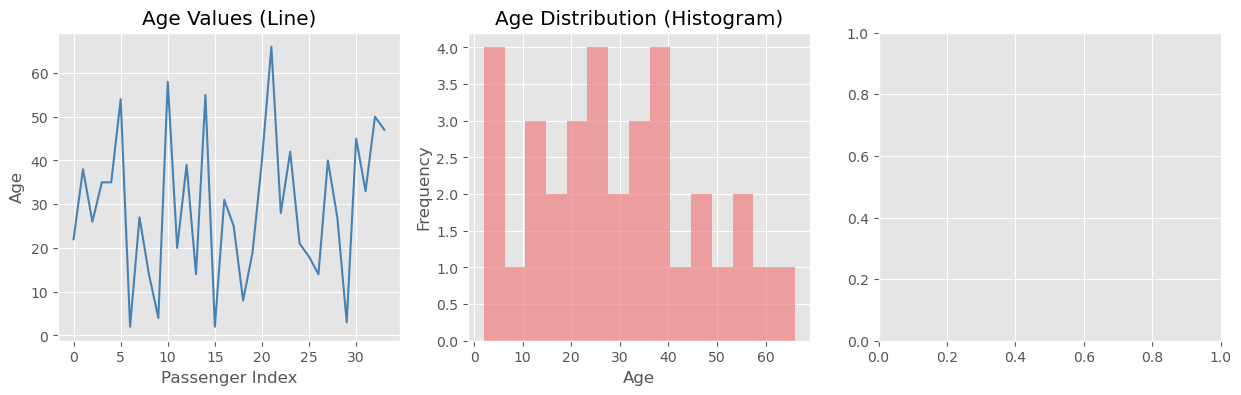

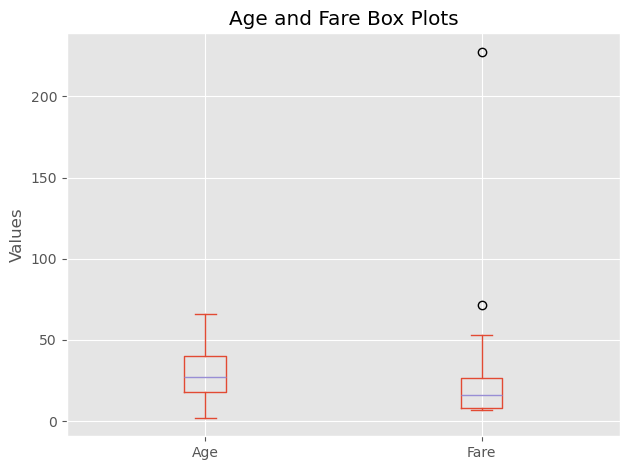

✅ Key pandas plotting syntax:
• df['column'].plot(kind='hist')
• df[['col1', 'col2']].plot(kind='box')


In [3]:
# Method 1: DataFrame.plot() - The pandas way!
plt.figure(figsize=(15, 4))

# Subplot 1: Line plot using DataFrame.plot()
plt.subplot(1, 3, 1)
titanic_data['Age'].plot(kind='line', color='steelblue', title='Age Values (Line)')
plt.xlabel('Passenger Index')
plt.ylabel('Age')

# Subplot 2: Histogram using DataFrame.plot()
plt.subplot(1, 3, 2)
titanic_data['Age'].plot(kind='hist', bins=15, color='lightcoral', alpha=0.7, title='Age Distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Subplot 3: Box plot using DataFrame.plot()
plt.subplot(1, 3, 3)
titanic_data[['Age', 'Fare']].plot(kind='box', title='Age and Fare Box Plots')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

print("✅ Key pandas plotting syntax:")
print("• df['column'].plot(kind='hist')")
print("• df[['col1', 'col2']].plot(kind='box')")

## 2. Direct Axes Control (`ax=`)

To place Pandas plots into a multi-panel Matplotlib dashboard, you **must** pass the target Axes object using the `ax=` parameter.

* **Syntax:** `df.plot(kind='...', ax=axes[row, col])`

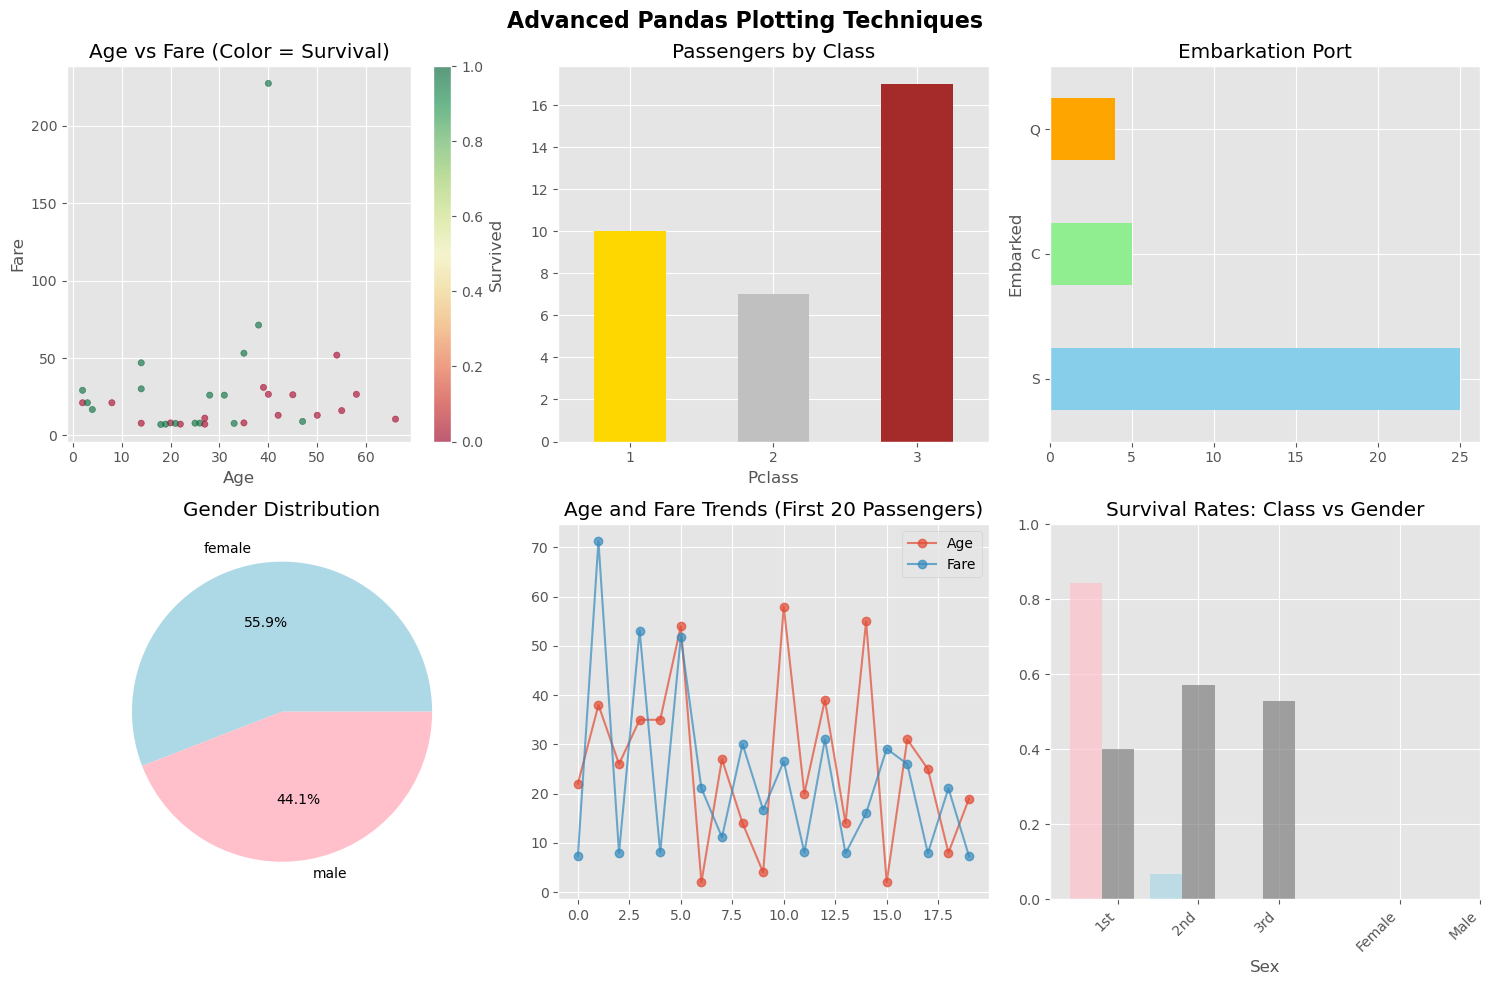

🎨 Advanced pandas plotting fixed:
• Always use ax=axes[row, col] parameter with pandas .plot() to control placement.


In [4]:
# Create the figure and subplots first (OO interface)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Advanced Pandas Plotting Techniques', fontsize=16, fontweight='bold')

# Subplot 1: Scatter plot using DataFrame.plot() with ax parameter
titanic_data.plot(kind='scatter', x='Age', y='Fare', c='Survived', 
                  colormap='RdYlGn', alpha=0.6, ax=axes[0, 0]) # <--- AXES CONTROL
axes[0, 0].set_title('Age vs Fare (Color = Survival)')

# Subplot 2: Bar plot using value_counts().plot() with ax parameter
titanic_data['Pclass'].value_counts().sort_index().plot(kind='bar', 
                                                       color=['gold', 'silver', 'brown'],
                                                       ax=axes[0, 1]) # <--- AXES CONTROL
axes[0, 1].set_title('Passengers by Class')
axes[0, 1].tick_params(axis='x', rotation=0)

# Subplot 3: Horizontal bar plot
titanic_data['Embarked'].value_counts().plot(kind='barh', 
                                             color=['skyblue', 'lightgreen', 'orange'],
                                             ax=axes[0, 2])
axes[0, 2].set_title('Embarkation Port')

# Subplot 4: Pie chart
titanic_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                         colors=['lightblue', 'pink'],
                                         ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_ylabel('') 

# Subplot 5: Multiple line plot
ages_fares = titanic_data[['Age', 'Fare']].head(20) 
ages_fares.plot(kind='line', alpha=0.7, ax=axes[1, 1], marker='o')
axes[1, 1].set_title('Age and Fare Trends (First 20 Passengers)')

# Subplot 6: Groupby results comparison
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
survival_by_sex = titanic_data.groupby('Sex')['Survived'].mean()

# Combine plots by passing ax multiple times
survival_by_class.plot(kind='bar', ax=axes[1, 2], alpha=0.7, color='gray', position=0, width=0.4)
survival_by_sex.plot(kind='bar', ax=axes[1, 2], alpha=0.7, color=['pink', 'lightblue'], position=1, width=0.4) 

axes[1, 2].set_title('Survival Rates: Class vs Gender')
axes[1, 2].set_xticks([0.2, 1.2, 2.2, 3.7, 4.7])
axes[1, 2].set_xticklabels(['1st', '2nd', '3rd', 'Female', 'Male'], rotation=45, ha='right')
axes[1, 2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("🎨 Advanced pandas plotting fixed:")
print("• Always use ax=axes[row, col] parameter with pandas .plot() to control placement.")

## 3. Time Series and Advanced Groupby Visualization

The Pandas plotting API shines for time series data and complex aggregation results.

* **Time Series:** Plotting a DataFrame with a `DatetimeIndex` automatically handles date formatting.
* **Rolling Average:** Calculated directly via Pandas' `.rolling()` method, then plotted.

🎯 Working with time series data...


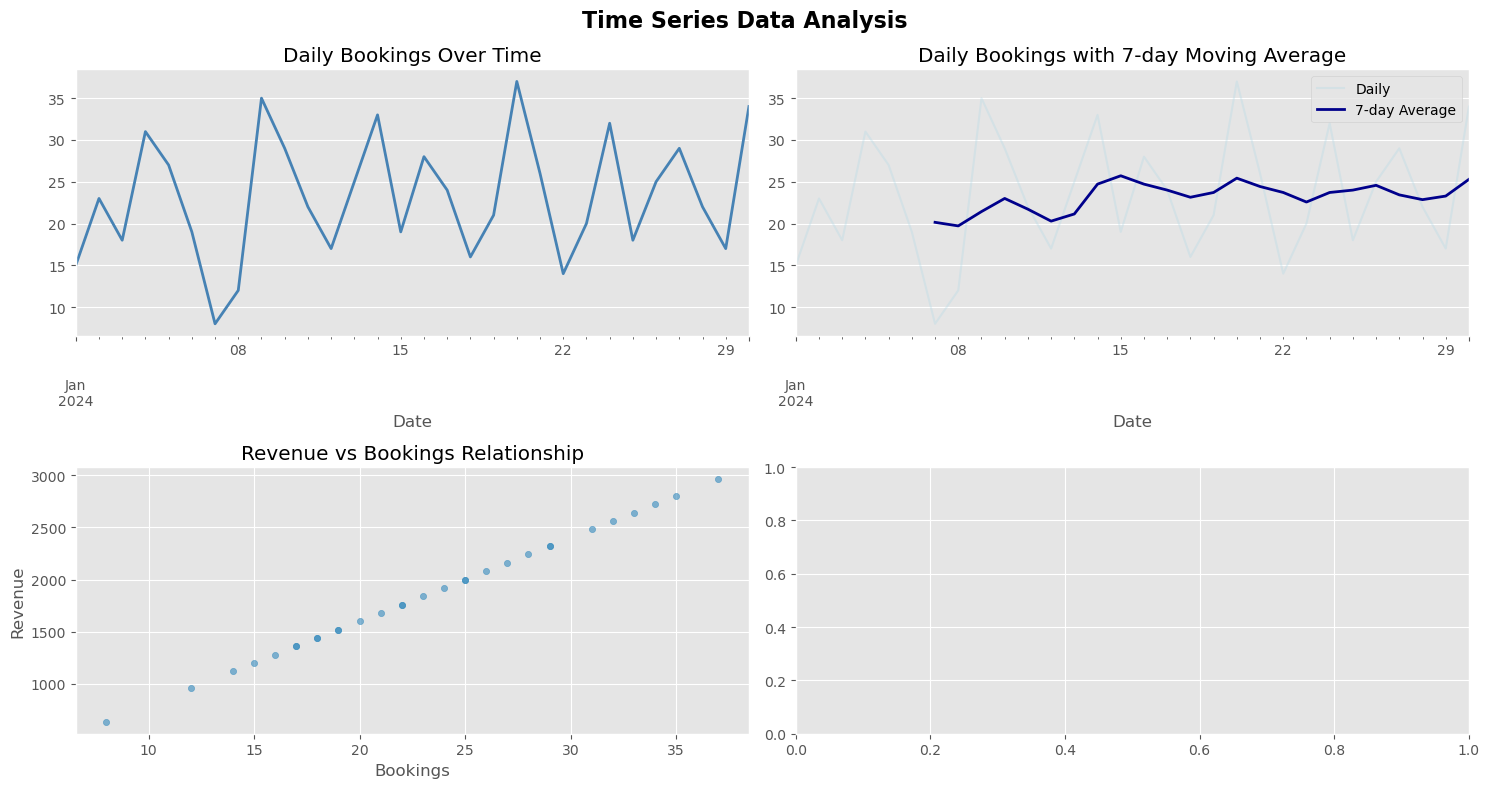

📅 Time series features:
• df.set_index('Date') makes dates the index.
• df['col'].rolling(window=7).mean() creates moving averages.


In [5]:
print("🎯 Working with time series data...")

# Create sample time series data
dates = pd.date_range('2024-01-01', periods=30, freq='D')
daily_bookings = pd.DataFrame({
    'Date': dates,
    'Bookings': [15, 23, 18, 31, 27, 19, 8, 12, 35, 29, 22, 17, 25, 33, 19,
                   28, 24, 16, 21, 37, 26, 14, 20, 32, 18, 25, 29, 22, 17, 34],
    'Revenue': [1200, 1840, 1440, 2480, 2160, 1520, 640, 960, 2800, 2320,
                1760, 1360, 2000, 2640, 1520, 2240, 1920, 1280, 1680, 2960,
                2080, 1120, 1600, 2560, 1440, 2000, 2320, 1760, 1360, 2720]
})

# Set Date as index for time series plotting
daily_bookings.set_index('Date', inplace=True)

# Create figure and subplots properly
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Time Series Data Analysis', fontsize=16, fontweight='bold')

# Subplot 1: Basic time series plot
daily_bookings['Bookings'].plot(ax=axes[0, 0], color='steelblue', linewidth=2)
axes[0, 0].set_title('Daily Bookings Over Time')

# Subplot 2: Rolling average
daily_bookings['Bookings'].plot(ax=axes[0, 1], alpha=0.3, color='lightblue', label='Daily')
daily_bookings['Bookings'].rolling(window=7).mean().plot(ax=axes[0, 1], color='darkblue', linewidth=2, label='7-day Average')
axes[0, 1].set_title('Daily Bookings with 7-day Moving Average')
axes[0, 1].legend()

# Subplot 3: Revenue vs Bookings scatter
daily_bookings.plot(kind='scatter', x='Bookings', y='Revenue', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Revenue vs Bookings Relationship')

plt.tight_layout()
plt.show()

print("📅 Time series features:")
print("• df.set_index('Date') makes dates the index.")
print("• df['col'].rolling(window=7).mean() creates moving averages.")

## 4. Practice Project: Final Integration Dashboard

We use Pandas plotting methods exclusively within a complex Matplotlib grid (`plt.subplot2grid`) to demonstrate the highest level of integration.

Remember: **Save before showing!**

🎯 PRACTICE PROJECT: Final Integration Dashboard

💾 Dashboard saved as 'part4_pandas_integration.png'


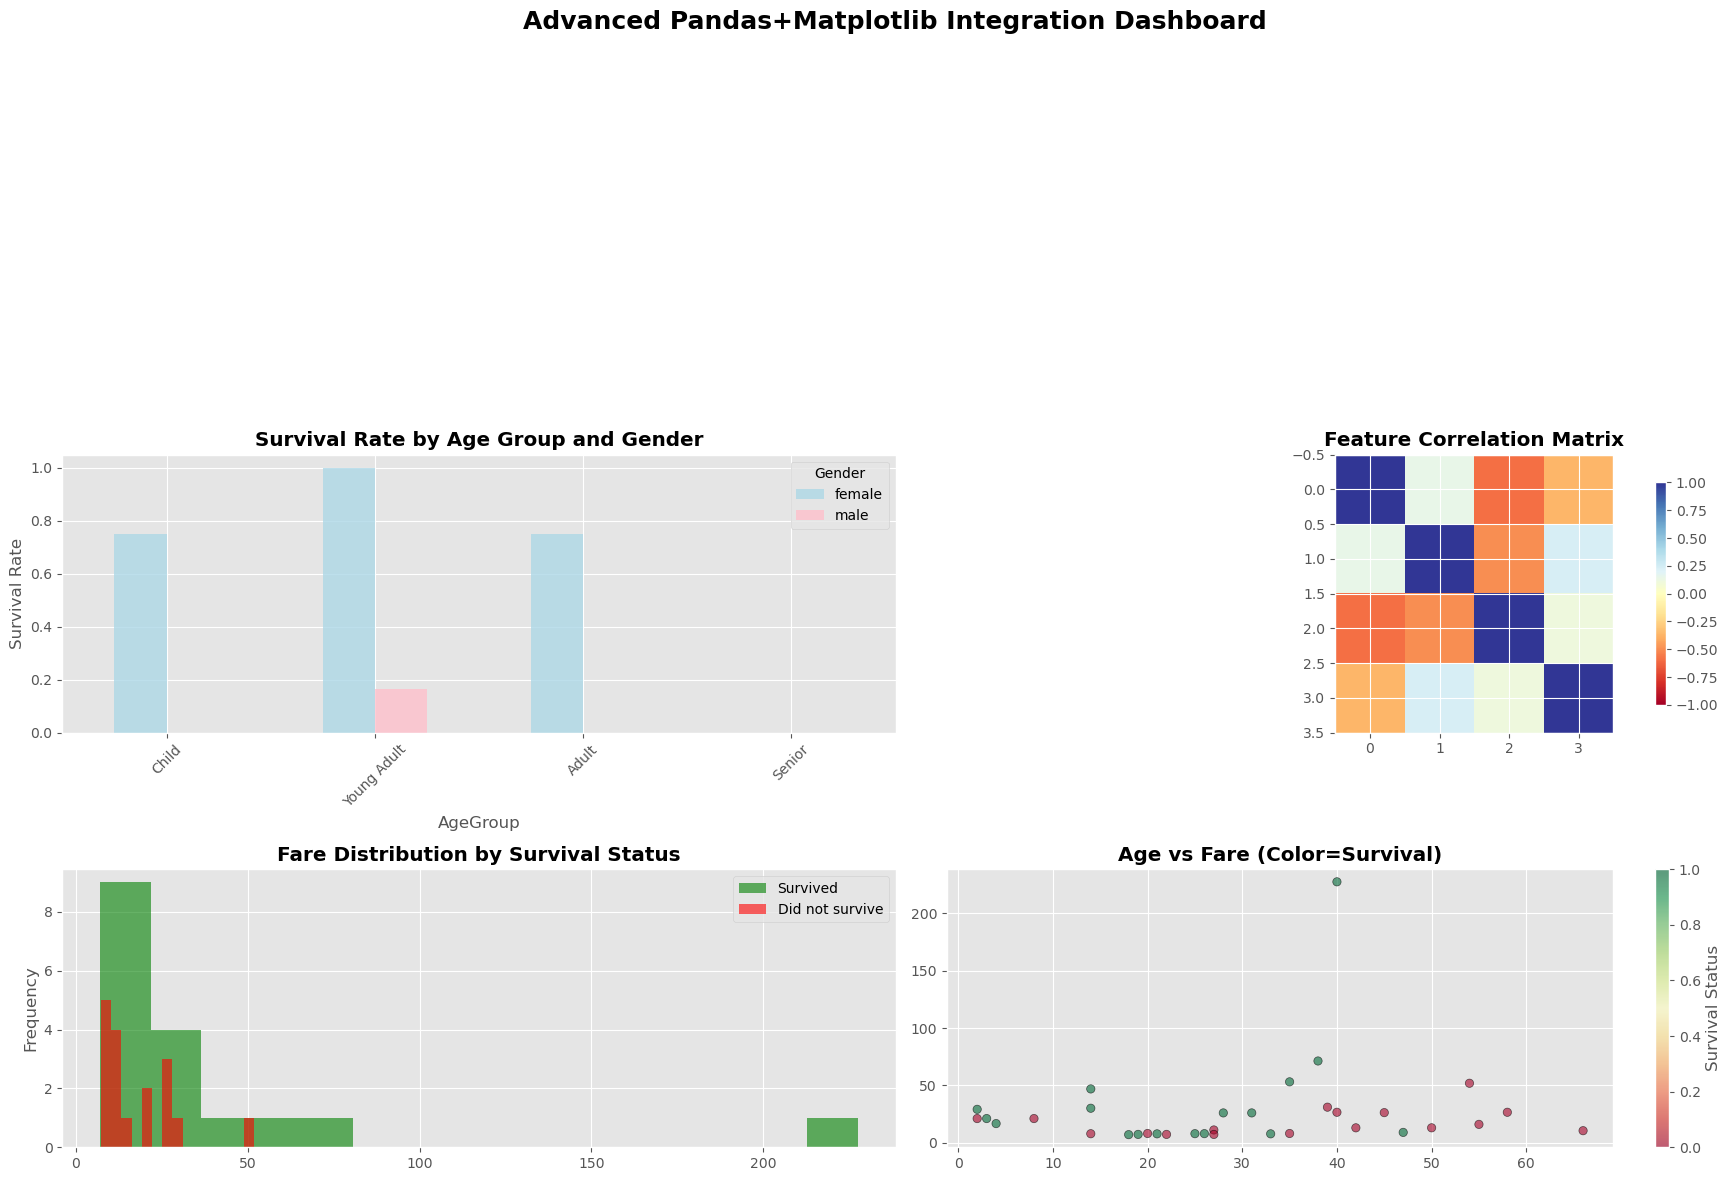

🎯 Part 4 complete! Pandas plotting integration mastered.


In [14]:
# CODE for Cell 10 (Practice Project and Export - FIXED)

print("🎯 PRACTICE PROJECT: Final Integration Dashboard")

# Create figure using plt.figure (for subplot2grid)
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Advanced Pandas+Matplotlib Integration Dashboard', fontsize=18, fontweight='bold')

# Create AgeGroup column needed for the plot
age_groups = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
titanic_data['AgeGroup'] = age_groups


# 1. Complex Grouped Bar Chart (middle left, spans 2 cols)
ax2 = plt.subplot2grid((3, 4), (1, 0), colspan=2)
# 🚨 FIX: Added observed=True to silence FutureWarning for categorical grouping
complex_analysis = titanic_data.groupby(['AgeGroup', 'Sex'], observed=True)['Survived'].mean().unstack()
complex_analysis.plot(kind='bar', ax=ax2, color=['lightblue', 'pink'], alpha=0.8)
ax2.set_title('Survival Rate by Age Group and Gender', fontweight='bold')
ax2.set_ylabel('Survival Rate')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Gender')


# 2. Correlation Matrix Visualization (middle right, spans 2 cols)
ax3 = plt.subplot2grid((3, 4), (1, 2), colspan=2)
numeric_data = titanic_data[['Age', 'Fare', 'Pclass', 'Survived']].copy()
correlation_matrix = numeric_data.corr()
im = ax3.imshow(correlation_matrix, cmap='RdYlBu', vmin=-1, vmax=1)
ax3.set_title('Feature Correlation Matrix', fontweight='bold')
plt.colorbar(im, ax=ax3, shrink=0.8) 

# 3. Fare Distribution by Survival (bottom left, spans 2 cols)
ax4 = plt.subplot2grid((3, 4), (2, 0), colspan=2)
survivors_fare = titanic_data[titanic_data['Survived'] == 1]['Fare']
non_survivors_fare = titanic_data[titanic_data['Survived'] == 0]['Fare']
survivors_fare.plot(kind='hist', bins=15, alpha=0.6, color='green', label='Survived', ax=ax4)
non_survivors_fare.plot(kind='hist', bins=15, alpha=0.6, color='red', label='Did not survive', ax=ax4)
ax4.set_title('Fare Distribution by Survival Status', fontweight='bold')
ax4.legend()

# 4. Advanced Scatter Plot (bottom right, spans 2 cols)
ax5 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
scatter = ax5.scatter(
    titanic_data['Age'], titanic_data['Fare'],
    c=titanic_data['Survived'],
    alpha=0.6, cmap='RdYlGn', edgecolors='black'
)
ax5.set_title('Age vs Fare (Color=Survival)', fontweight='bold')
plt.colorbar(scatter, ax=ax5, label='Survival Status') 

plt.tight_layout()

# Save the figure BEFORE plt.show()
plt.savefig('part4_pandas_integration.png', dpi=300, bbox_inches='tight')
print("\n💾 Dashboard saved as 'part4_pandas_integration.png'")

plt.show()

print("🎯 Part 4 complete! Pandas plotting integration mastered.")